## **Bloque 3: Modelos no supervisados**
----

In [1]:
%pylab
%matplotlib inline

%config InlineBackend.figure_format = 'retina'

Using matplotlib backend: agg
Populating the interactive namespace from numpy and matplotlib


## Medida de la distancia entre dos puntos.
En Python la distancia entre dos puntos se puede obtener utilizando la función `cdist`de la biblioteca *SciPy*. Para ello se ha de indicar dos vectores con las coordenadas, las distancia con un campo de texto y las opciones de la distancia. Las distancias más utilizadas son
* Euclídea: `euclidean`
* Minkowski: `minkowski`
* Distancia del taxista o manhanta: `cityblock`
* Euclídea normalizada: `seuclidean`

En el caso de la distancia de Minkowski se ha de indicar el parámetro `p` y en el caso de la euclídea normalizada la media y la varianza a utilizar. En las siguientes líneas se pueden ver los diferentes resultados para un vector dado.

In [2]:
from scipy.spatial.distance import cdist

p1 = [[0, 1]]
p2 = [[1, 2]]

print(u'Euclídea:', cdist(p1, p2, 'euclidean')[0][0])
print(u'Minkowski (p = 1):', cdist(p1, p2, 'minkowski', p = 1)[0][0])
print(u'Minkowski (p = 2):', cdist(p1, p2, 'minkowski', p = 2)[0][0])
print(u'Minkowski (p = 3):', cdist(p1, p2, 'minkowski', p = 3)[0][0])
print(u'Distancia del taxista:', cdist(p1, p2, 'cityblock')[0][0])
print(u'Euclídea normalizada:', cdist(p1, p2, 'seuclidean', V =[0.25, 0.5])[0][0])

Euclídea: 1.4142135623730951
Minkowski (p = 1): 2.0
Minkowski (p = 2): 1.4142135623730951
Minkowski (p = 3): 1.2599210498948732
Distancia del taxista: 2.0
Euclídea normalizada: 2.449489742783178


En este caso se puede observar que la distancia de Minkoski con `p` igual a 1 es la distancia del taxista, mientras que con 2 es la euclídea.

## Preparación de los datos
Para trabajar con problemas de no supervisados vamos a utilizar un conjunto de datos generado con la función `make_blobs`. Esta función genera puntos aleatorios que se reparten entre la cantidad de clústeres que se le indica. En el siguiente ejemplo se generan tres conjuntos de datos con 500 registros que se reparten en 3, 5 y 7 clústeres respectivamente.

In [3]:
from sklearn.datasets import make_blobs

blobs_3, classes_3 = make_blobs(500,
                                centers      = 3,
                                cluster_std  = 0.5,
                                random_state = 0)

blobs_5, classes_5 = make_blobs(500,
                                centers      = 5,
                                cluster_std  = 0.5,
                                random_state = 0)

blobs_7, classes_7 = make_blobs(500,
                                centers      = 7,
                                cluster_std  = 0.5,
                                random_state = 0)

## **Algoritmo de k-means**
El algoritmo de *k-means* es una de las técnicas de análisis de clúster más utilizadas debido a su sencillez y la facilidad con la que se pueden interpretar los resultados. El algoritmo solamente necesita un conjunto de datos para ser entrenado y conocer previamente el número de clústeres en los que se ha de dividir.
1. En el espacio n-dimensional se han de obtener tantas coordenadas, a las que se denominan centroides, como clústeres se van a crear. Para esto se pueden seleccionar de forma aleatoria o mediante alguno otro algoritmo.
2. Calcular un valor de distancia de cada uno de los puntos del conjunto de datos a todos los centroides. Cada punto se asignará al clúster del centroide que tenga más cerca.
3. Una vez asignados todos los puntos a un clúster ser calcula la posición media de sus componentes, pasando a ser este el nuevo centroide.
4. Se ha de comprobar si la posición de los nuevos centroides se ha desplazado respecto a los anteriores menos de una cantidad prefijada. En caso afirmativo se finaliza el proceso y en caso negativo se vuelve al punto 2.

En *sckit-learn* se pueden utilizar dos constructores diferentes para la implementación del algoritmo de k-means: ` KMeans` y `MiniBatchKMeans`. En el primer caso se utilizarán todos los datos a la hora de entrenar el modelo, mientras que en el segundo solamente se utilizará un subconjunto de los datos aleatorio. Siendo más adecuado utilizar `MiniBatchKMeans` cuando el conjunto de datos es grande. 

En el siguiente ejemplo se utilizará `KMeans` para segmentar los datos generados anteriormente. 

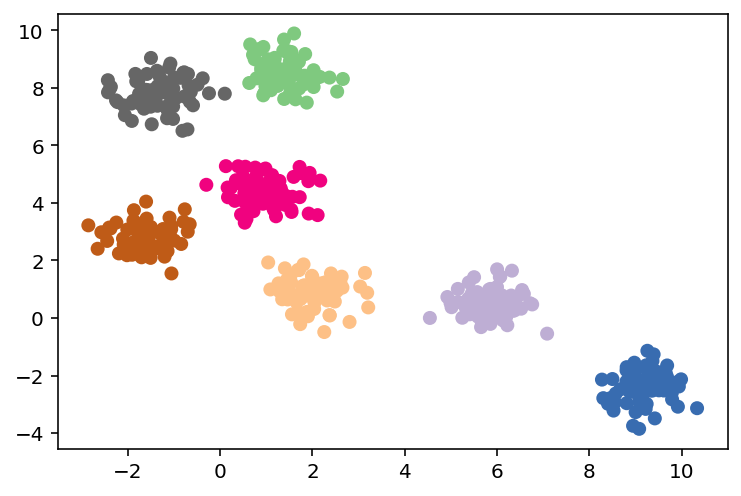

In [4]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 7, random_state = 1).fit(blobs_7)
classes = kmeans.predict(blobs_7)

scatter(blobs_7[:, 0], blobs_7[:, 1], c = classes, cmap = 'Accent')

En este ejemplo se ha utilizado k-means para obtener 7 clústeres en el conjunto de datos de entrenamiento que se ha creado alrededor de siete centros. Una vez realizado el entrenamiento se ha asignado un clúster a cada uno de los puntos y se ha representado asignando un color diferente a cada uno.

En caso de cambiar el número aleatorio que se utiliza en el proceso de entrenamiento los resultados pueden cambiar.

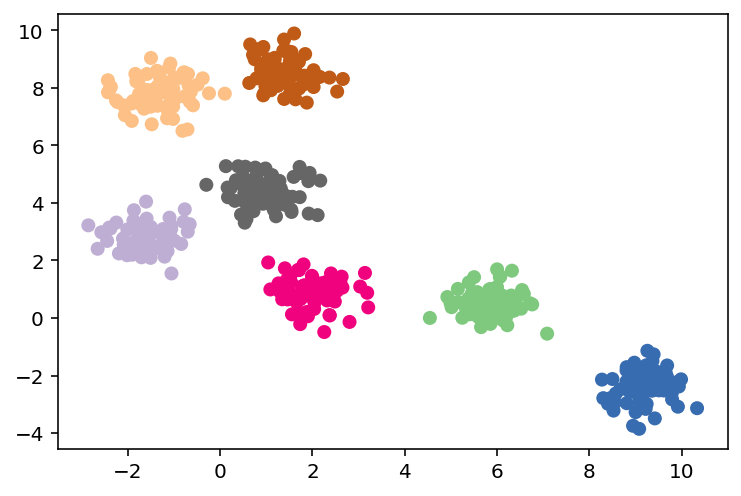

In [5]:
kmeans = KMeans(n_clusters = 7, random_state = 2).fit(blobs_7)
classes = kmeans.predict(blobs_7)

scatter(blobs_7[:, 0], blobs_7[:, 1], c = classes, cmap = 'Accent')

Aquí se puede apreciar que, aunque siempre se obtienen los mismos grupos, la etiqueta que se le asocia (el color) puede ser diferente. En caso más complejos, donde la separación de los clústeres puede no ser tan clara, los clústeres que se obtienen con cada una de las semillas pueden ser diferentes. Esto se puede apreciar en el siguiente ejemplo.

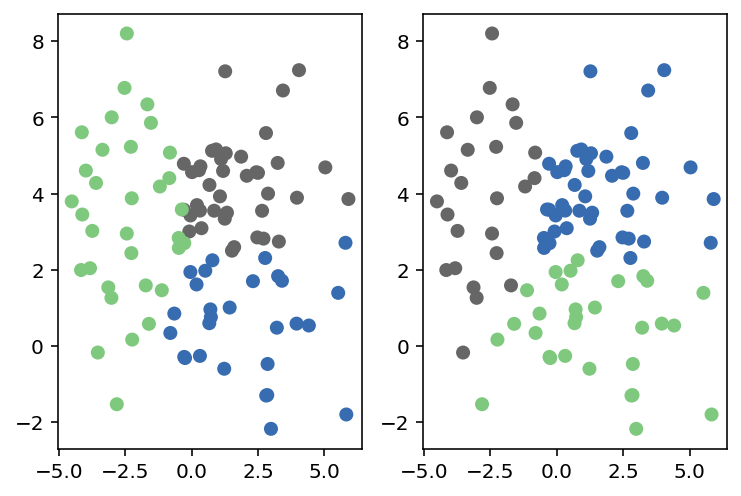

In [6]:
blobs, classes = make_blobs(100,
                            centers      = 3,
                            cluster_std  = 2,
                            random_state = 0)

kmeans = KMeans(n_clusters = 3, random_state = 1).fit(blobs)
classes = kmeans.predict(blobs)

subplot(1, 2, 1)
scatter(blobs[:, 0], blobs[:, 1], c = classes, cmap = 'Accent')

kmeans = KMeans(n_clusters = 3, random_state = 2).fit(blobs)
classes = kmeans.predict(blobs)

subplot(1, 2, 2)
scatter(blobs[:, 0], blobs[:, 1], c = classes, cmap = 'Accent')

Por ejemplo, el punto (de color azul en ambos casos) situado en la coordenada [-2,5 -2] se puede ver que el ejemplo de la izquierda pertenece al clúster situado en la parte inferior, mientras que el en ejemplo de la derecha pertenece al clúster situado en la parte izquierda.

Para evitar que una configuración inicial de los puntos de lugar a una solución poco habitual puede ejecutarse el algoritmo de k-means con más de una vez y seleccionar la configuración más estable. Esta cantidad se puede cambiar con la opción `n_init`, que por defecto es 10.

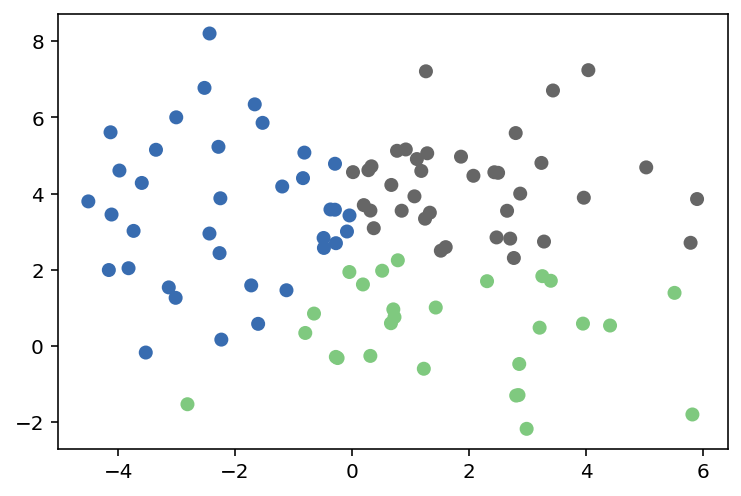

In [7]:
kmeans = KMeans(n_clusters = 3, random_state = 0, n_init = 100).fit(blobs)
classes = kmeans.predict(blobs)

scatter(blobs[:, 0], blobs[:, 1], c = classes, cmap = 'Accent')

Esto no soluciona el problema, de que un punto puede aparecer en un clúster u otro dependiendo de la semilla, pero evita obtener resultados inestables.

Uno de los problemas de k-means es la necesidad de conocer el número de clústeres que existen en el conjunto de datos. Una selección incorrecta de los mismos se puede ver en el siguiente ejemplo donde se utiliza el conjunto de generado con 5 centros para segmentar en 3, 5 y 7 clústeres. 

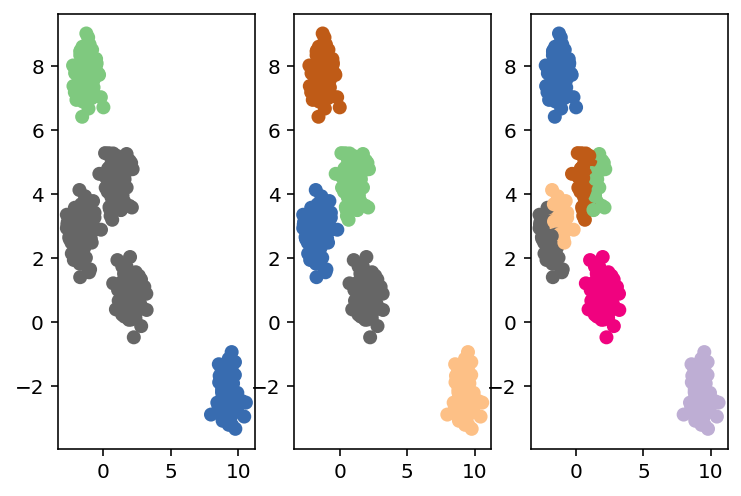

In [8]:
kmeans = KMeans(n_clusters = 3, random_state = 1).fit(blobs_5)
classes = kmeans.predict(blobs_5)

subplot(1, 3, 1)
scatter(blobs_5[:, 0], blobs_5[:, 1], c = classes, cmap = 'Accent')

kmeans = KMeans(n_clusters = 5, random_state = 1).fit(blobs_5)
classes = kmeans.predict(blobs_5)

subplot(1, 3, 2)
scatter(blobs_5[:, 0], blobs_5[:, 1], c = classes, cmap = 'Accent')

kmeans = KMeans(n_clusters = 7, random_state = 1).fit(blobs_5)
classes = kmeans.predict(blobs_5)

subplot(1, 3, 3)
scatter(blobs_5[:, 0], blobs_5[:, 1], c = classes, cmap = 'Accent')

En la figura se puede apreciar lo que sucede cuando se seleccionar menos clústeres de los adecuados en la gráfica de la izquierda donde se han agrupado tres en uno. Por otro lado, en la gráfica de la derecha se puede apreciar la situación contraria donde dos clústeres se han dividido en dos. Por lo que se puede apreciar la importancia de conocer este dato.

### Identificación del número de clústeres
Para la identificación del número de clústeres en un conjunto de datos se pueden utilizar múltiples técnicas. Dos de las más utilizadas son dispersión y Silhouette. En ambas técnicas se ha de ejecutar el algoritmo de k-means para diferentes números de clústeres y comparar los resultados de diferentes métricas.

En el método de la distorsión se utiliza la distancia al cuadrado de los puntos al centroide más próximo (valor disponible en la propiedad `inertia_` de los objetos `KMeans`) frente al número de clústeres. En el momento cambia la velocidad de reducción de la dispersión se entiende que se ha llegado a la cantidad óptima de clústeres. Este proceso se puede ver en el siguiente código.

Text(0, 0.5, 'Dispersión')

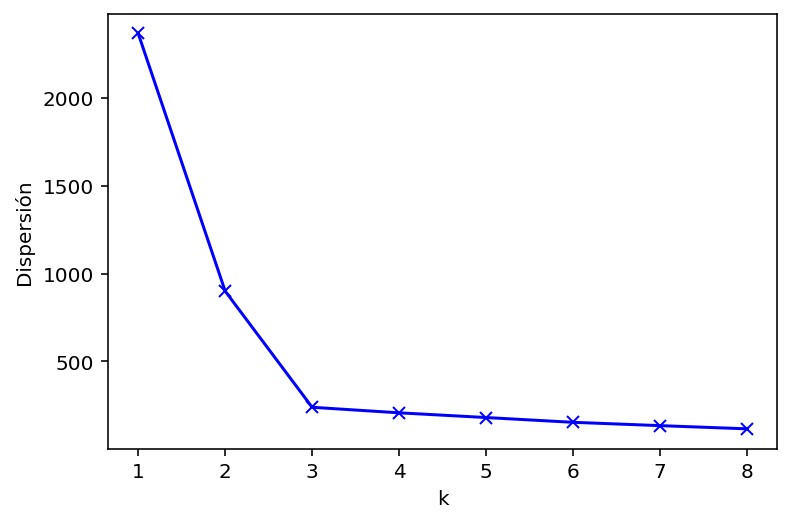

In [9]:
inertia = []

for k in range(1, 9):
    kmeans = KMeans(n_clusters = k, random_state = 1).fit(blobs_3)
    inertia.append(kmeans.inertia_)

plot(range(1, 9), inertia, 'bx-')
xlabel('k')
ylabel(u'Dispersión')

La gráfica es el resultado del proceso descrito anteriormente para el conjunto de datos generado con tres clústeres. En esta gráfica se puede observar que la velocidad de reducción de la dispersión se reduce considerablemente al llegar a 3 clústeres, siendo este el resultado esperado.

Este se ha de repetir para cada conjunto de datos, por lo que puede ser una buena idea factorizarlo.

In [10]:
def plot_dispersion(x, figure_name = None, max_k = 10, n_init = 10, random_state = 1):
    inertia = []

    for k in range(1, max_k):
        kmeans = KMeans(n_clusters = k, n_init = n_init, random_state = random_state).fit(x)
        inertia.append(kmeans.inertia_)

    plot(range(1, max_k), inertia, 'bx-')
    xlabel('k')
    ylabel(u'Dispersión')
    if figure_name != None:
        title(figure_name)

Pudiéndose de esta manera repetir el proceso para cada uno de los conjuntos de datos.

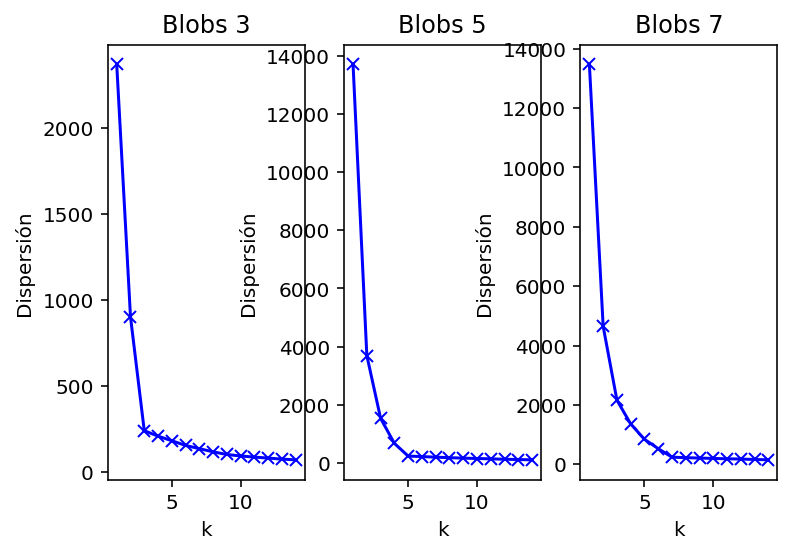

In [11]:
subplot(1, 3, 1)        
plot_dispersion(blobs_3, 'Blobs 3', max_k = 15)
subplot(1, 3, 2)        
plot_dispersion(blobs_5, 'Blobs 5', max_k = 15)
subplot(1, 3, 3)        
plot_dispersion(blobs_7, 'Blobs 7', max_k = 15)

En las gráficas anteriores se puede apreciar que el algoritmo funciona perfectamente para con los conjuntos de datos utilizados anteriormente.

Por otro lado, El coeficiente de la Silhouette se calcula a partir de la distancia intra-clúster media de los elementos de un clúster (a) y la distancia media a los elementos del clúster más cercano (b). El valor de la Silhouette es
$$
    s = \frac{b - a}{\max(a, b)},
$$
por lo que el valor se encuentra acotado entre -1 y 1. Al representar este valor frente al número de clústeres se observa un máximo para el valor óptimo. 

El método que permite calcular la *Silhouette* se encuentra disponible es `silhouette_score`. Un ejemplo del proceso se puede ver en el siguiente código.

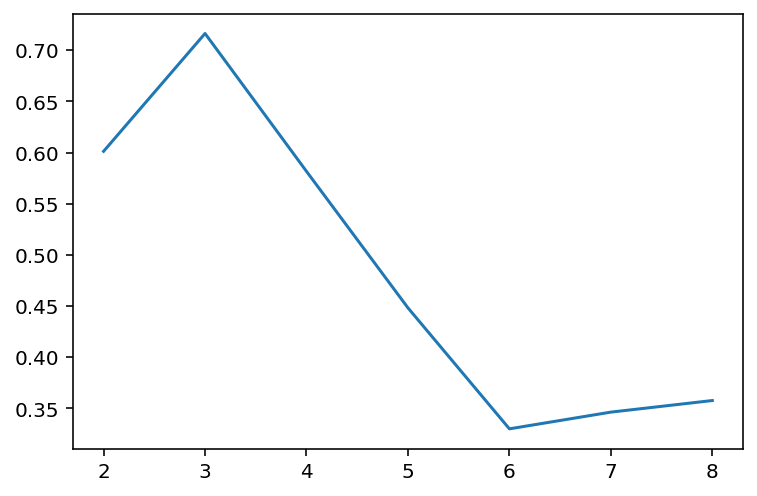

In [12]:
from sklearn.metrics import silhouette_score

sillhouette_avgs = []

for k in range(2, 9):
    kmean = KMeans(n_clusters = k).fit(blobs_3)
    sillhouette_avgs.append(silhouette_score(blobs_3, kmean.labels_))

plot(range(2, 9), sillhouette_avgs)

En esta figura se observa un máximo en 3, lo esperado para este conjunto de datos.

A diferencia del método de la distorsión, donde se comenzaba la gráfica con un clúster, en este caso se ha comenzado con dos debido a que la Silhouette de un único clúster no se puede calcular.
 
Al igual que antes el proceso se puede factorizar.

In [13]:
def plot_sillhouette(x, figure_name = None, max_k = 10, n_init = 10, random_state = 1):
    sillhouette_avgs = []

    for k in range(2, max_k):
        kmeans = KMeans(n_clusters = k, n_init = n_init, random_state = random_state).fit(x)
        sillhouette_avgs.append(silhouette_score(x, kmeans.labels_))
        
    plot(range(2, max_k), sillhouette_avgs, 'bx-')
    xlabel('k')
    ylabel(u'Silhouette')
    if figure_name != None:
        title(figure_name)

Y ejecutar el proceso para cada uno de los conjuntos de datos.

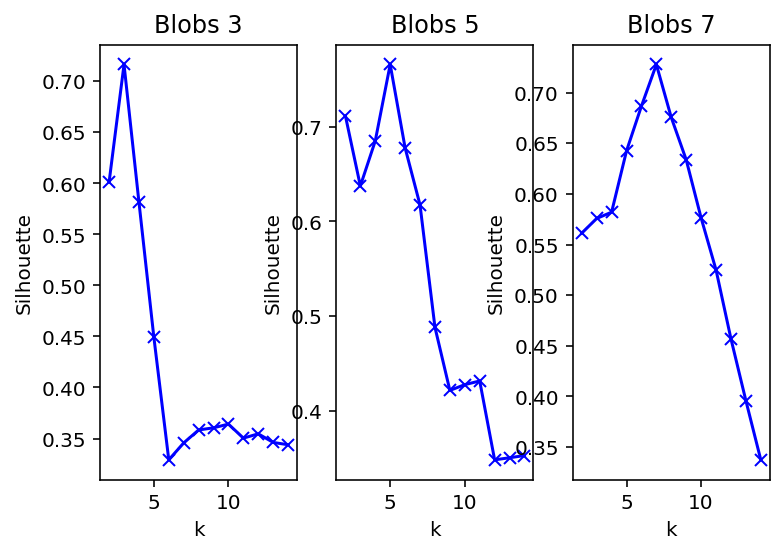

In [14]:
subplot(1, 3, 1)        
plot_sillhouette(blobs_3, 'Blobs 3', max_k = 15)
subplot(1, 3, 2)        
plot_sillhouette(blobs_5, 'Blobs 5', max_k = 15)
subplot(1, 3, 3)        
plot_sillhouette(blobs_7, 'Blobs 7', max_k = 15)

Al igual que el caso anterior se puede observar que los resultados son los esperados.

## **Organización de clústeres como árbol jerárquico**
En este ejemplo se va analizar la agrupación jerárquica utilizando el enfoque a aglomerativo de enlace complejo. Este es un procedimiento iterativo que se puede resumir en los siguientes pasos: 
1. Calcular la matriz de distancias entre todos los registros.
2. Representar cada punto como un clúster único
3. Combinar los dos clústeres más cercanos en base a la distancia de los miembros más separados
4. Actualizar la distancia entre todos los nuevos clústeres.
5. Repetir los pasos de 3 a 5 hasta que quede un único clúster.

En la implementación del algoritmo el primer paso es la construcción de la matriz de distancias. Para ello, de cara a facilitar la comprensión de los resultados, se utilizarán únicamente los siete primeros registros del conjunto de datos `blobs_3` utilizado previamente.

Utilizando la función `pdist`de la libreria *SciPy* --esta función es similar a `cdist` pero, en lugar de calcular la distancia entre dos vectores, la calcula entre todos los puntos de un vector-- se puede calcular la distancia entre todos los puntos. Para presentar el resultado como una matriz se ha utilizado la función `squareform`.

In [15]:
import pandas as pd
from scipy.spatial.distance import pdist, squareform

df = pd.DataFrame(blobs_3[0:7, :])
row_dist = pd.DataFrame(squareform(pdist(df, metric = 'euclidean')))
row_dist

,0,1,2,3,4,5,6
0,0.000000,3.028303,3.524016,1.041577,1.037090,0.078658,1.368065
1,3.028303,0.000000,0.889575,3.033856,2.066599,2.963025,2.385958
2,3.524016,0.889575,0.000000,3.268844,2.687891,3.470318,2.563212
3,1.041577,3.033856,3.268844,0.000000,1.573100,1.075854,0.709893
4,1.037090,2.066599,2.687891,1.573100,0.000000,0.961538,1.368356
5,0.078658,2.963025,3.470318,1.075854,0.961538,0.000000,1.361108
6,1.368065,2.385958,2.563212,0.709893,1.368356,1.361108,0.000000


A continuación, se puede utilizar la función `linkage` de *SciPy* para calcular la agrupación jerárquica. La forma de llamarla es mediante la matriz condesada (la salida de la función `pdist`) e indicándole método a usar

In [16]:
from scipy.cluster.hierarchy import linkage

row_clusters = linkage(pdist(df, metric = 'euclidean'),
                       method = 'complete')

pd.DataFrame(row_clusters,
             columns = ['fila 1', 'fila 2', 'distancia', 'items en clúster'],
             index = ['clúster %d' %(i) for i in range(row_clusters.shape[0])])

,fila 1,fila 2,distancia,items en clúster
clúster 0,0.0,5.0,0.078658,2.0
clúster 1,3.0,6.0,0.709893,2.0
clúster 2,1.0,2.0,0.889575,2.0
clúster 3,4.0,7.0,1.037090,3.0
clúster 4,8.0,10.0,1.573100,5.0
clúster 5,9.0,11.0,3.524016,7.0


Finalmente se pueden representar los datos utilizando la función `dendrogram`.

**Nota:** En el momento de escribir este notebook la función `dendrogram` produce un fallo cuando los notebooks se ejecutan en macOS. La figura se genera, pero para la ejecución del código.

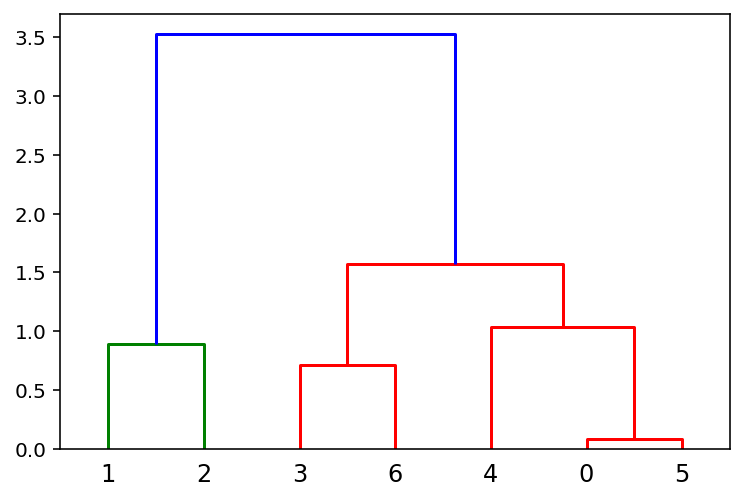

In [17]:
import platform
from scipy.cluster.hierarchy import dendrogram

if (platform.system() != 'Darwin'):
    dendrogram(row_clusters)  

En la figura se puede ver la forma en la que organizan los clústeres.

In [18]:
from sklearn.cluster import AgglomerativeClustering

ac = AgglomerativeClustering(n_clusters = 2,
                             affinity = 'euclidean',
                             linkage = 'complete')
ac.fit_predict(df)

array([0, 1, 1, 0, 0, 0, 0])

En este código se puede observar que se obtienen los mismos resultados que se han obtenido previamente

## **Localización de regiones a través de DBSCAN**
Otro de los algoritmos más utilizados para la realización de análisis de clúster es el agrupamiento espacial basado en densidad de aplicaciones con ruido (DBSCAN, "Density-Based Spatial Clustering of Applications with Noise"). Entendiéndose por densidad el número de puntos que se encuentran en un radio ε de cada punto.
El primer paso para a la hora de implementar este algoritmo es calificar a cada uno de todos los puntos en una de las siguientes tipologías:
* *Núcleo*: son todos los puntos que contienen por lo menos un número mínimo de puntos en el entorno de radio $\varepsilon$.
* *Alcanzable*: son los puntos que no contienen el número mínimo de puntos en el entorno de radio $\varepsilon$, pero existe por lo menos un núcleo dentro de este rango.
* *Ruido*: son el resto de puntos del conjunto de datos.

A diferencia de los vistos anteriormente en este algoritmo es necesario conocer el número de clústeres, sino que este es un resultado del proceso. A diferencia es necesario indicar el radio, parámetro `eps`, el número mínimo de muestras, parámetro `min_samples`, y la métrica utilizada. En las siguientes líneas se puede ver un ejemplo de utilización.

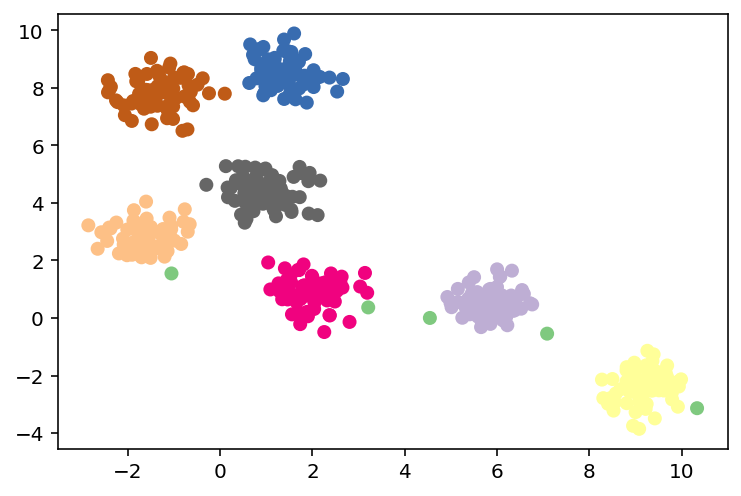

In [19]:
from sklearn.cluster import DBSCAN

classes = DBSCAN(eps = 0.6,
            min_samples = 5,
            metric = 'euclidean').fit_predict(blobs_7)

scatter(blobs_7[:, 0], blobs_7[:, 1], c = classes, cmap = 'Accent')

En el ejemplo se puede ver que el algoritmo ha identificado siete clústeres diferentes en el conjunto de datos `blobs_7`. En este caso no ha sido necesario indicarle la cantidad de clústeres, sino que el radio y el número de puntos mínimos en este radio para clasificarlos. A diferencia de los algoritmos anteriores en este también se han identificado puntos como ruido que no han sido asignados a ningún clúster, éstos son los que se pueden ver en color verde.

## **Comparación de algoritmos**
Ahora se puede realizar una comparación de los resultados que pueden obtener con los diferentes algoritmos estudiados. En las siguientes líneas podemos comparamos el resultado en el conjunto de datos `blobs_3`.

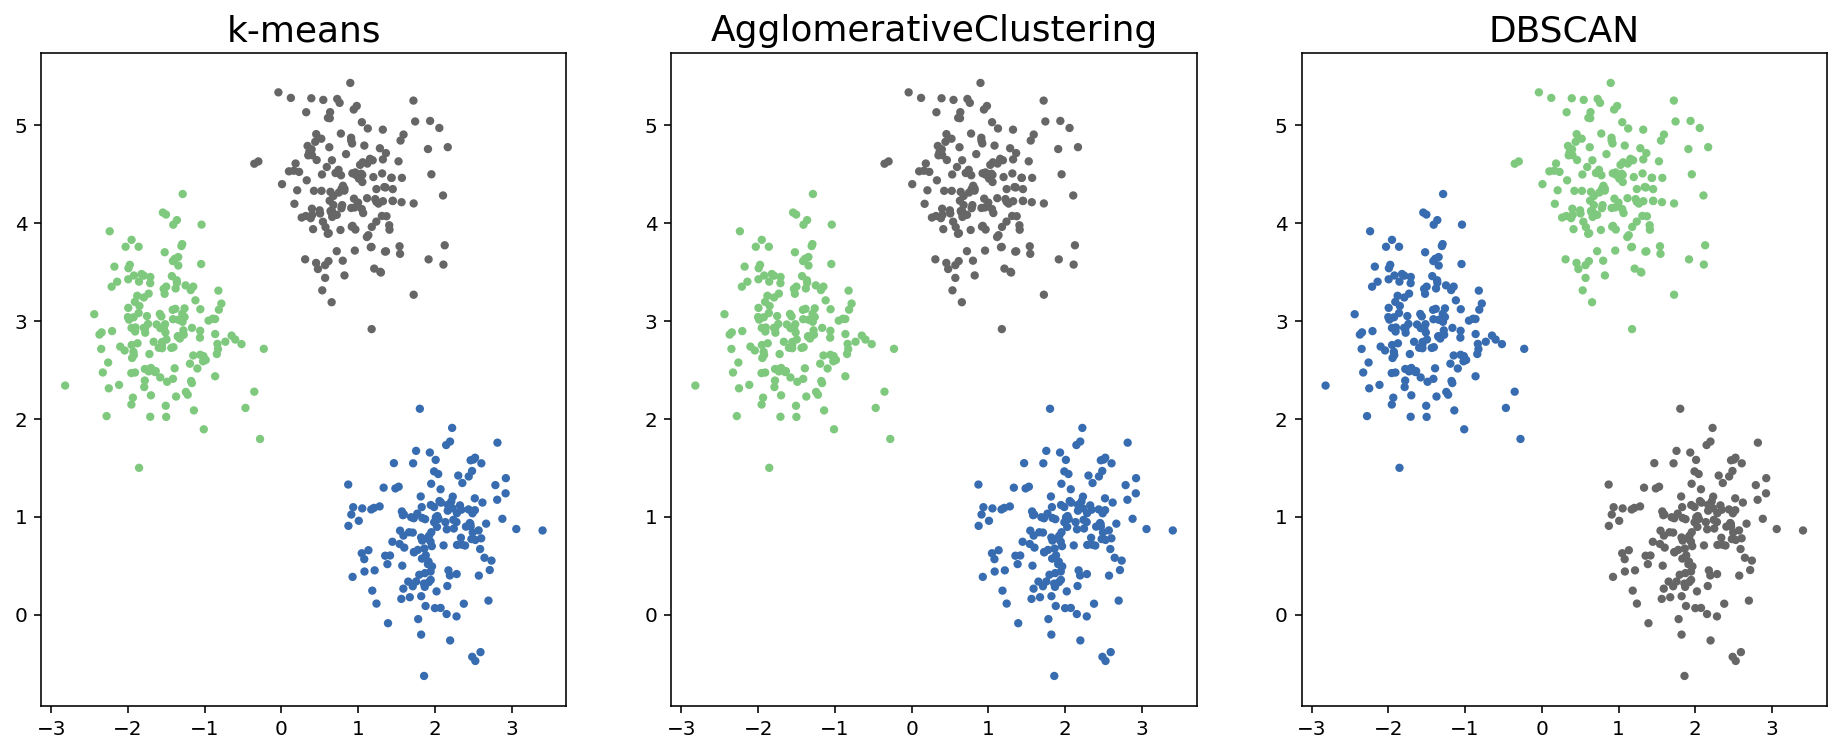

In [20]:
from sklearn.cluster import DBSCAN

km = KMeans(n_clusters = 3,
            random_state = 1).fit_predict(blobs_3)

ac = AgglomerativeClustering(n_clusters = 3, 
                             affinity = 'euclidean',
                             linkage = 'complete').fit_predict(blobs_3)

db = DBSCAN(eps = 0.6,
            min_samples = 5,
            metric = 'euclidean').fit_predict(blobs_3)

figure(figsize=(16, 6))
subplot(1, 3, 1)
plt.title('k-means', size=18)
scatter(blobs_3[:, 0], blobs_3[:, 1], s=10,  c = km, cmap = 'Accent')
subplot(1, 3, 2)
plt.title('AgglomerativeClustering', size=18)
scatter(blobs_3[:, 0], blobs_3[:, 1], s=10,  c = ac, cmap = 'Accent')
subplot(1, 3, 3)
plt.title('DBSCAN', size=18)
scatter(blobs_3[:, 0], blobs_3[:, 1], s=10,  c = db, cmap = 'Accent')

En este caso se puedo ser bar que los tres algoritmos ofrecen el mismo resultado. Ahora se puede probar con el conjunto de datos `blobs_5`.

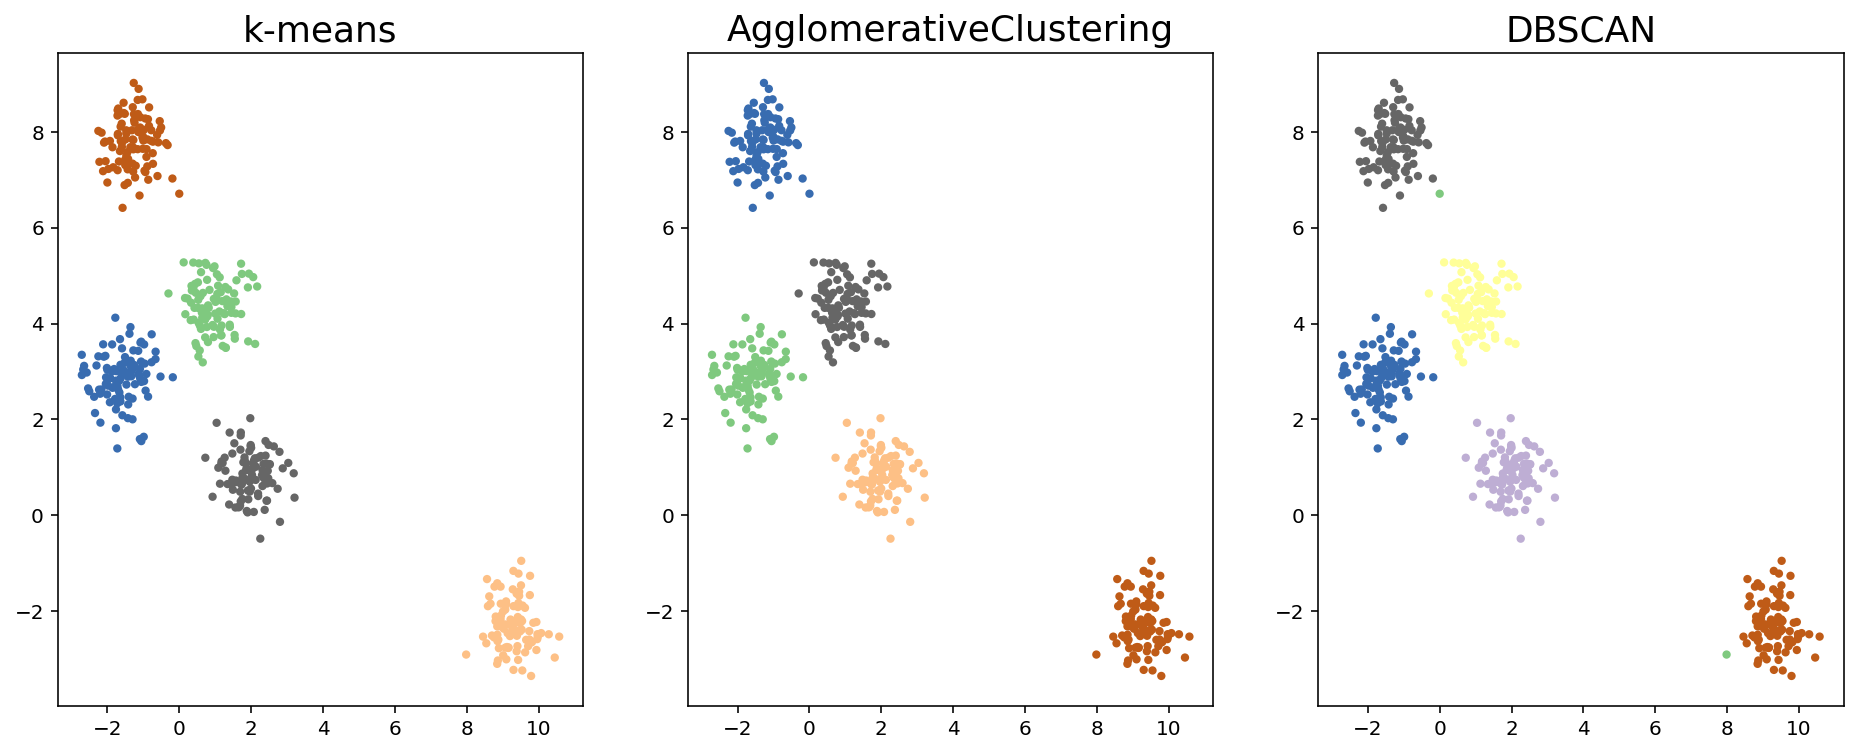

In [21]:
km = KMeans(n_clusters = 5,
            random_state = 1).fit_predict(blobs_5)

ac = AgglomerativeClustering(n_clusters = 5, 
                             affinity = 'euclidean',
                             linkage = 'complete').fit_predict(blobs_5)

db = DBSCAN(eps = 0.6,
            min_samples = 5,
            metric = 'euclidean').fit_predict(blobs_5)

figure(figsize=(16, 6))
subplot(1, 3, 1)
plt.title('k-means', size=18)
scatter(blobs_5[:, 0], blobs_5[:, 1], s=10,  c = km, cmap = 'Accent')
subplot(1, 3, 2)
plt.title('AgglomerativeClustering', size=18)
scatter(blobs_5[:, 0], blobs_5[:, 1], s=10,  c = ac, cmap = 'Accent')
subplot(1, 3, 3)
plt.title('DBSCAN', size=18)
scatter(blobs_5[:, 0], blobs_5[:, 1], s=10,  c = db, cmap = 'Accent')

Para este al conjunto de datos todos los algoritmos han identificado cinco clústeres. Únicamente el algoritmo DBSCAN ha identificado algunos puntos como ruido, por lo que no los ha asignado a ningún clúster.

Ahora se puede probar con otro conjunto de datos. Por ejemplo, se puede utilizar el método `make_moons` para generar regiones con forma de luna. Eso es lo que se muestra en el siguiente conjunto de código

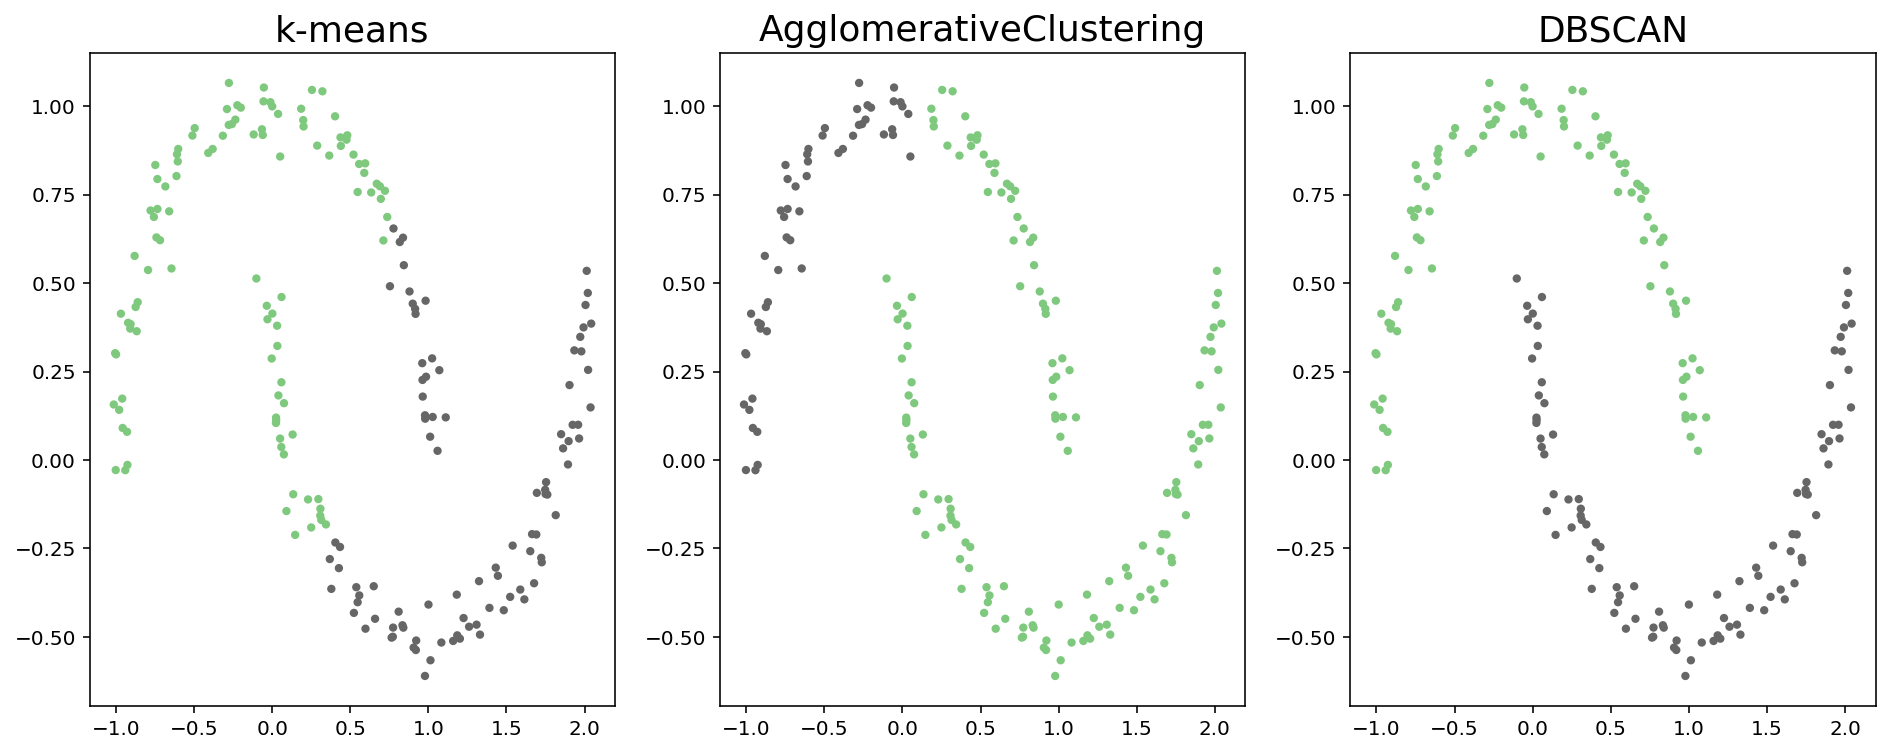

In [22]:
from sklearn.datasets import make_moons

moons, moons_classes = make_moons(n_samples = 200,
                                  noise = 0.05,
                                  random_state = 1)

km = KMeans(n_clusters = 2,
            random_state = 1).fit_predict(moons)

ac = AgglomerativeClustering(n_clusters = 2, 
                             affinity = 'euclidean',
                             linkage = 'complete').fit_predict(moons)

db = DBSCAN(eps = 0.2,
            min_samples = 5,
            metric = 'euclidean').fit_predict(moons)

figure(figsize=(16, 6))
subplot(1, 3, 1)
plt.title('k-means', size = 18)
scatter(moons[:, 0], moons[:, 1], s=10, c = km, cmap = 'Accent')
subplot(1, 3, 2)
plt.title('AgglomerativeClustering', size = 18)
scatter(moons[:, 0], moons[:, 1], s=10, c = ac, cmap = 'Accent')
subplot(1, 3, 3)
plt.title('DBSCAN', size = 18)
scatter(moons[:, 0], moons[:, 1], s=10, c = db, cmap = 'Accent')

Al utilizar lunas en lugar de manchas se puede observar que solamente DBSCAN puede identificaste correctamente estas regiones. Esto es así porque solamente este algoritmo está pensado para trabajar con regiones irregulares.

## **Gaussian Mixture**
El algoritmo k-means puede etiquetar rápidamente esos grupos de una manera que coincida con lo que se puede hacer a simple vista:

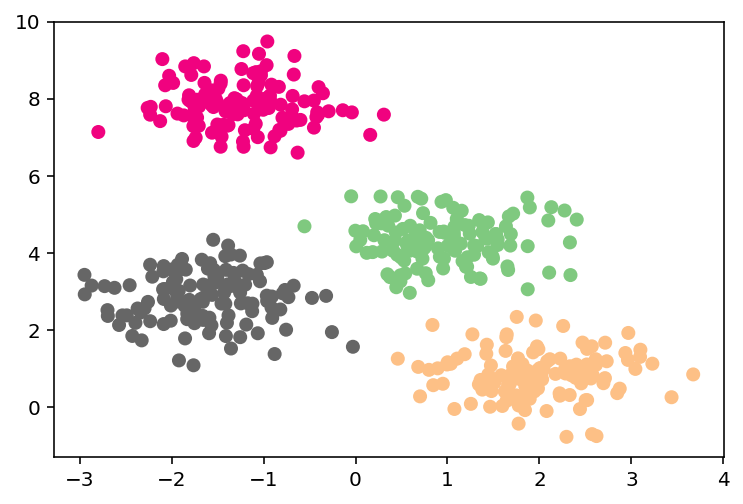

In [23]:
blobs, classes = make_blobs(500,
                            centers=4,
                            cluster_std=0.6,
                            random_state=0)

kmeans = KMeans(4, random_state=0)
labels = kmeans.fit_predict(blobs)

scatter(blobs[:, 0], blobs[:, 1], c=labels, cmap='Accent')

Aunque este tiene un problema todos los registros del conjunto de datos pertenecen a un cluster. En el caso de que se desee representar los cluster se puede buscar el más alejado para definir unos círculos.

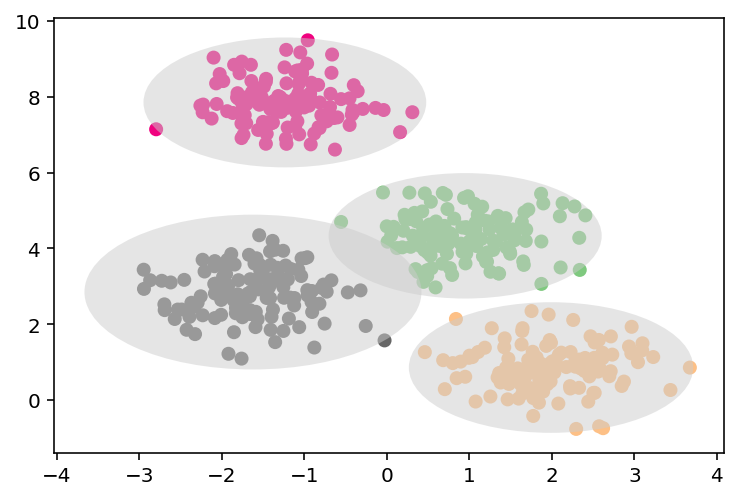

In [24]:
def plot_kmeans(kmeans, X, n_clusters=4):
    labels = kmeans.fit_predict(X)
    
    # Plot the data
    ax =plt.gca()
    plt.scatter(blobs[:, 0], blobs[:, 1], c=labels, cmap='Accent')

    # plot the representation of the KMeans model
    centers = kmeans.cluster_centers_
    radii = [cdist(X[labels == i], [center]).max() for i, center in enumerate(centers)]
    
    for c, r in zip(centers, radii):
        ax.add_patch(plt.Circle(c, r, fc='#CCCCCC', alpha=0.5))
        
plot_kmeans(kmeans, blobs)

## **Modelos Gaussian Mixture (GMM)**
Los modelos de Gaussian Mixture (GMM) intenta encontrar una mezcla de distribuciones de probabilidad gaussianas multidimensionales que modelen mejor cualquier conjunto de datos de entrada. Esto se puede utilizar para buscar los grupos de una forma similar a k-means.

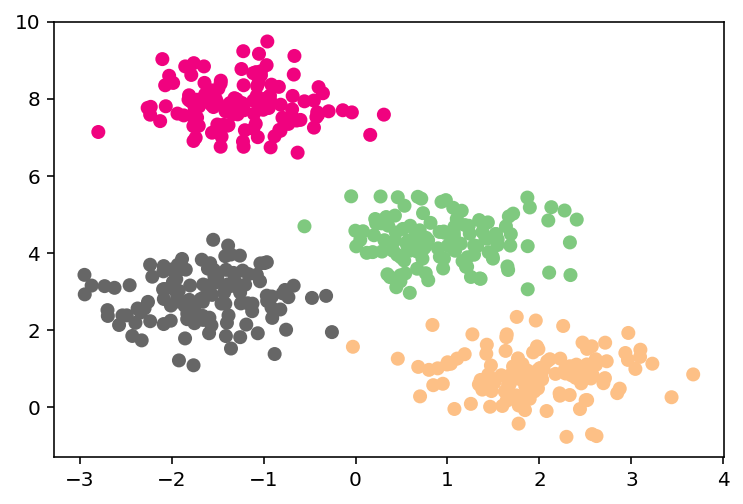

In [25]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=4, random_state=0)
labels = gmm.fit_predict(blobs)

scatter(blobs[:, 0], blobs[:, 1], c=labels, cmap='Accent')

GMM son modelos probabilísticos que asigna una probabilidad de pertenecer a cada uno de los conglomerados, los que se puede obtener con el método `predict_proba` de la clase. Lo que devuelve una matriz en la que cada fila representa un registro y en cada columna se muestra su posibilidad de pertenecer a un cluster. Lo que posibilita que un punto pueda pertenecer a más de un cluster o a ninguno.

In [26]:
probs = gmm.predict_proba(blobs)
probs[:5].round(3)

array([[0.   , 1.   , 0.   , 0.   ],
       [0.   , 1.   , 0.   , 0.   ],
       [1.   , 0.   , 0.   , 0.   ],
       [1.   , 0.   , 0.   , 0.   ],
       [0.002, 0.998, 0.   , 0.   ]])

En este caso el quinto registro tiene una probabilidad del 0,2% de pertenecer al segundo cluster y de 99,8% de pertenecer al primero. El resto están al 100% en su cluster.

Lo que se puede hacer es buscar otros registros que tenga un 30% de posibilidades de pertenecer al 2 clusters.

In [27]:
probs[sum(probs > 0.3, axis=1) > 1].round(3)

array([[0.001, 0.616, 0.   , 0.383]])

En este ejemplo solamente hay un punto, pero se puede ver que tiene una probabilidad del 61% de pertenecer al primer cluster y del 38% de pertenecer al cuarto

Esto hace que cada uno de los grupos no sea homogéneo, sino que tengamos modelos en los que los bordes de los clusters sean suaves. Esto se puede visualizar mejor si se dibujan la salida del GMM en base a la probabilidad.

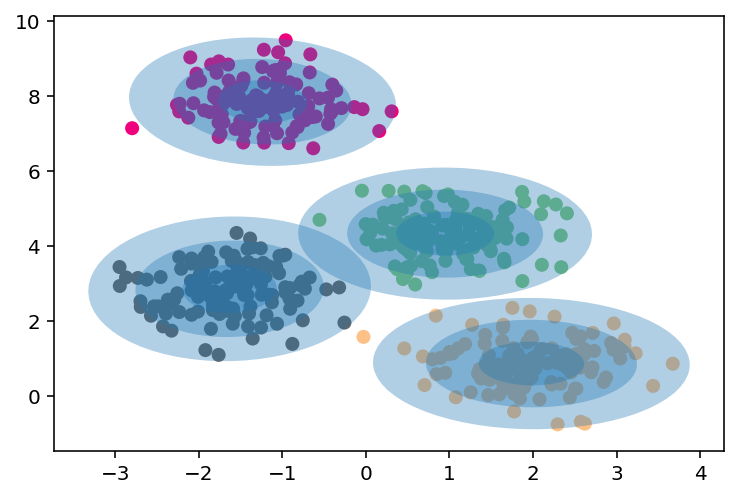

In [28]:
from matplotlib.patches import Ellipse

def draw_ellipse(position, covariance, ax=None, **kwargs):
    ax = ax or plt.gca()
    
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    elif covariance.shape == ():
        angle = 0
        width = 2 * np.sqrt(covariance)
        height = width
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))
        
def plot_gmm(gmm, X, equal=False):
    ax = plt.gca()
    labels = gmm.fit_predict(X)
    
    ax.scatter(X[:, 0], X[:, 1], c=labels, cmap='Accent')
    
    w_factor = 0.35 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor)

    if equal:
        axis('equal');
        
plot_gmm(gmm, blobs)

## **Estimación de densidad con GMM**

GMM, aunque se estudia dentro de los modelos de clustering, es un algoritmo para estimar la densidad de los datos. GMM son modelos probabilísticos que describe la distribución de los datos.

Esto se puede ver con los datos de lunas.

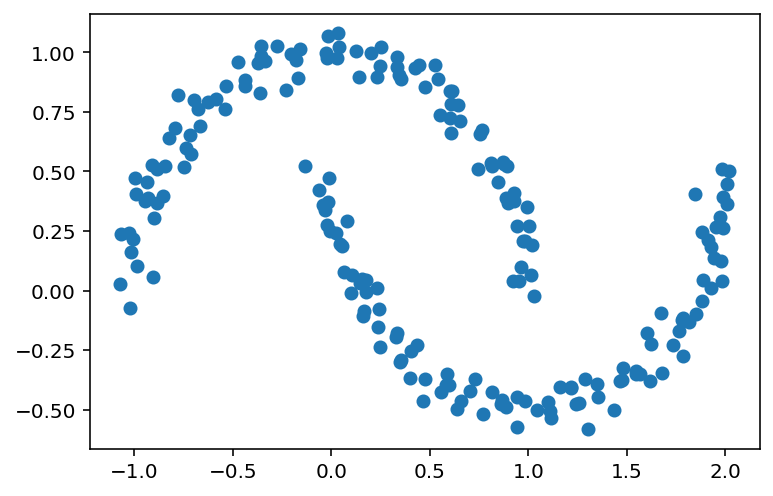

In [29]:
moons, labels = make_moons(200, noise=.05, random_state=0)
scatter(moons[:, 0], moons[:, 1]);

Al ajustar las lunas a con un GMM de dos componentes los resultados son similares a los que se obtienen con k-means.Por lo que no son especialmente útiles.

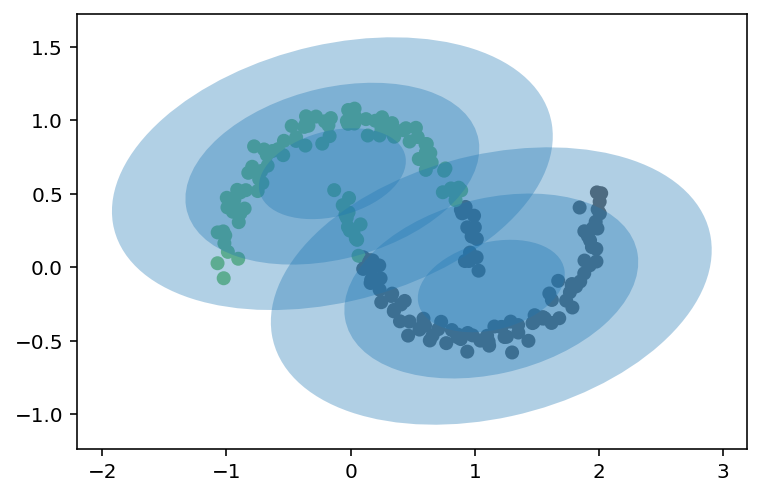

In [30]:
gmm = GaussianMixture(n_components=2, covariance_type='full', random_state=0)
plot_gmm(gmm, moons)

Pero si ajustamos con más clusters, se puede obtener una distribución de la densidad realmente útil.

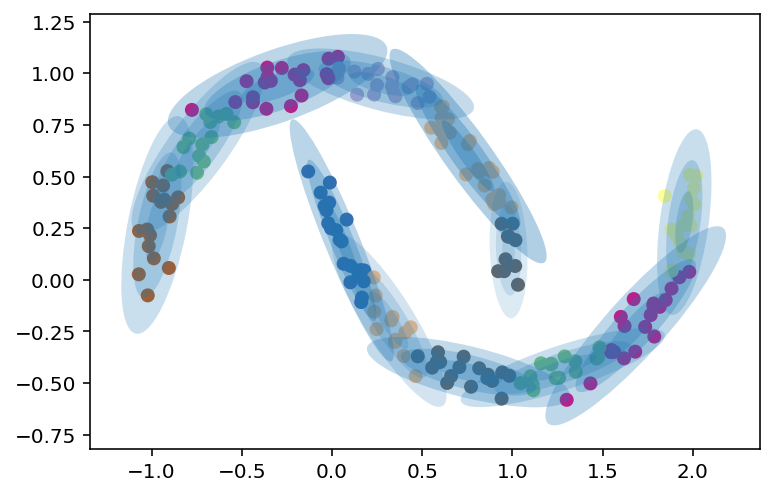

In [31]:
gmm = GaussianMixture(n_components=12, covariance_type='full', random_state=0)
plot_gmm(gmm, moons)

### Selección del número de clústeres
Al igual que en el caso de k-means es necesario seleccionar el número óptimo de clusters. En este case se puede utilizar el criterio de información de Akaike (Akaike information criterion, AIC) o el criterio de información bayesiano (Bayesian information criterion, BIC) para ello. El número óptimo de clusters es el valor que minimiza el AIC o BIC, según la aproximación que deseemos usar.

BIC : 6
AIC : 11


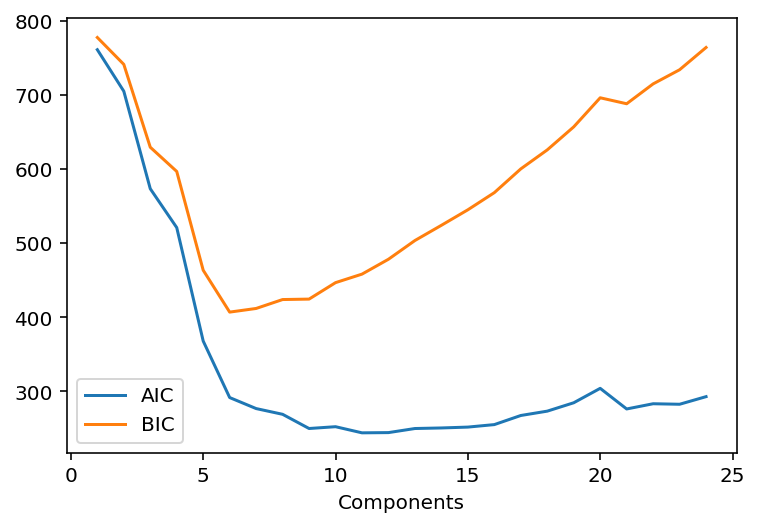

In [32]:
components = 25

aic = []
bic = []

for n in np.arange(1, components):
    gmm = GaussianMixture(n_components=n, covariance_type='full', random_state=0)
    gmm.fit(moons)
    
    aic.append(gmm.aic(moons))
    bic.append(gmm.bic(moons))

plot(np.arange(1, components), aic, label='AIC')
plot(np.arange(1, components), bic, label='BIC')


plt.legend(loc='best')
plt.xlabel('Components');

print('BIC : %s' % (numpy.where(bic == numpy.amin(bic))[0][0] + 1))
print('AIC : %s' % (numpy.where(aic == numpy.amin(aic))[0][0] + 1))

En este caso AIC nos indica que el número de clusters óptimo es 6, mientra que BIC indica 11 para este conjunto de datos.

### El tipo de covarianza

En los ejemplos anteriores se en muchas ocasiones se ha indicado un valor diferente para la opción `covariance_type`. Siendo este hiperparámetro el que controla los grados de libertad de los clústeres. Los posibles valores son:

* 'full': cada componente tiene su propia matriz de covarianza general
* 'tied':  todos los componentes comparten la misma matriz de covarianza general
* 'diag': cada componente tiene su propia matriz de covarianza diagonal
* 'spherical': cada componente tiene su propia varianza única

Las diferencias se pueden ver en el siguiente ejemplo

Text(0.5, 1.0, 'spherical')

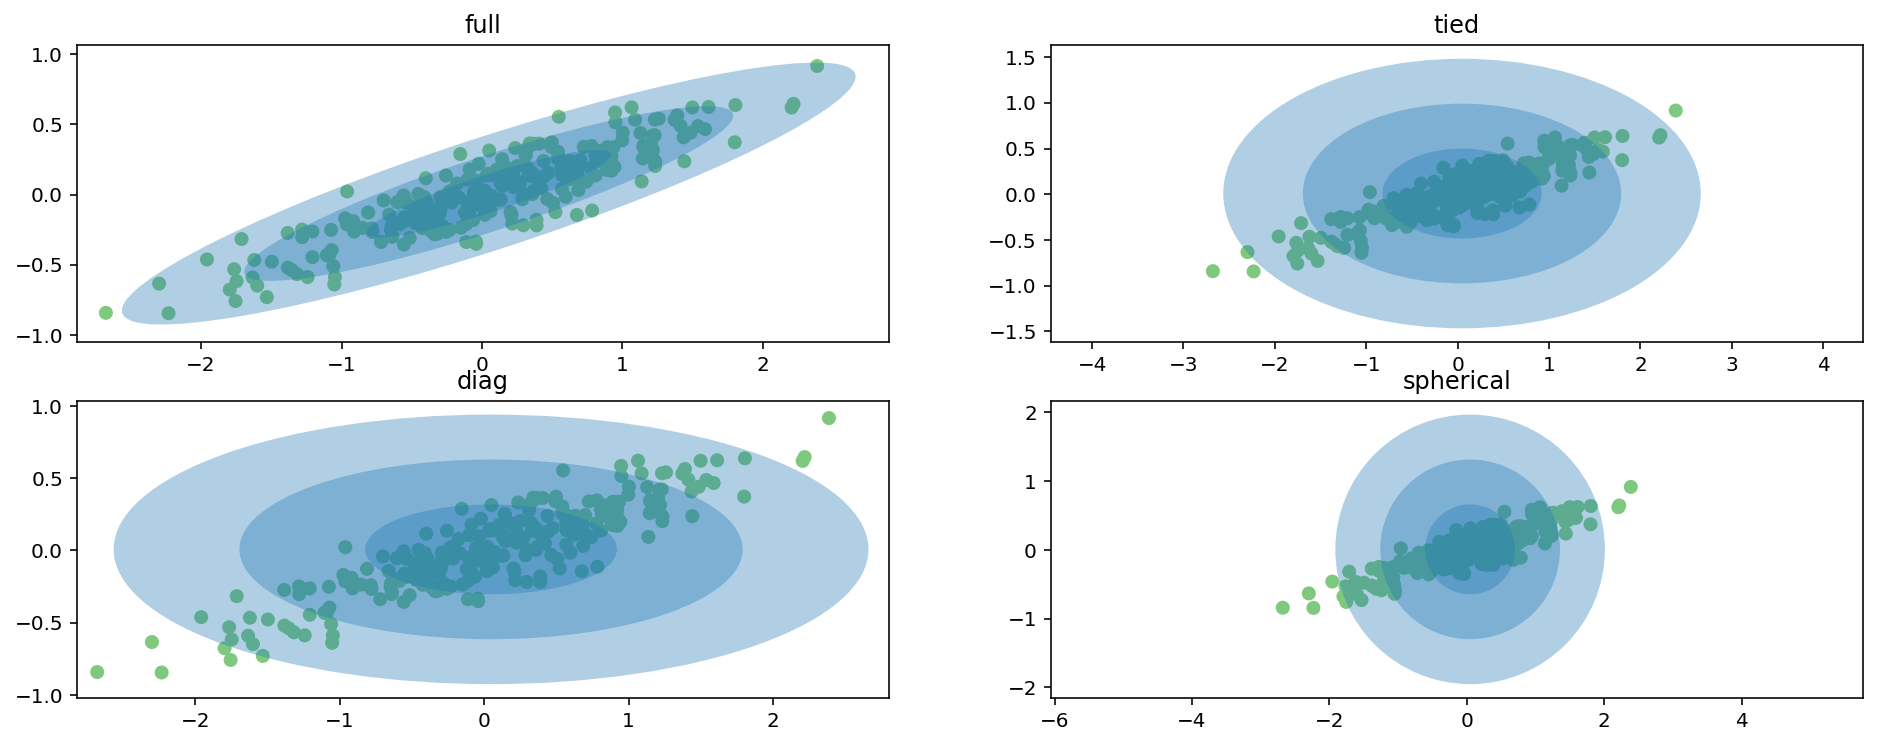

In [33]:
np.random.seed(1)
X = np.dot(np.random.random(size = (2, 2)), np.random.normal(size = (2, 250))).T

figure(figsize=(16, 6))

subplot(2, 2, 1)
gmm = GaussianMixture(1, covariance_type='full', random_state=0)
plot_gmm(gmm, X, equal=True)
title('full')

subplot(2, 2, 2)
gmm = GaussianMixture(1, covariance_type='tied', random_state=0)
plot_gmm(gmm, X, equal=True)
title('tied')

subplot(2, 2, 3)
gmm = GaussianMixture(1, covariance_type='diag', random_state=0)
plot_gmm(gmm, X, equal=True)
title('diag')

subplot(2, 2, 4)
gmm = GaussianMixture(1, covariance_type='spherical', random_state=0)
plot_gmm(gmm, X, equal=True)
title('spherical')